In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
df = pd.read_parquet('D:\RonaldoStats\Data\Ronaldo_processed.parquet')
df.head()

,Date,Competition,Round,Venue,Squad,Opponent,Start,Body Part,Minute,Score,Goalkeeper,Assist,Goal,Age,Jersey,Pos.,Match Result
0,2002-10-07,Primeira Liga,Matchweek 6,Home,Sporting CP,Moreirense,Y,Head,90,3-0,Roberto Volpato,Rui Jorge,1,17,28,LW,Win
1,2002-10-07,Primeira Liga,Matchweek 6,Home,Sporting CP,Moreirense,Y,Right Foot,34,3-0,Roberto Volpato,No assist,1,17,28,LW,Win
2,2002-10-26,Primeira Liga,Matchweek 8,Away,Sporting CP,Boavista,N,Right Foot,88,2-1,Carlos Martins,Tiago Ferreira,1,17,28,,Win
3,2002-11-24,Taca de Portugal,Round 4,Home,Sporting CP,CD Estarreja,N,Left Foot,67,4-1,No data,Cesar Prates,1,17,28,LW,Win
4,2002-12-18,Taca de Portugal,Round 5,Home,Sporting CP,FC Oliveira do Hospital,Y,Left Foot,13,8-1,No data,No assist,1,17,28,SS,Win


Se realizarán gráficos para saber cuáles nos pueden servir para un dashboard

In [8]:
#agrupamos los datos por columnas 
df_agrupado = df.groupby('Age')['Goal'].sum().reset_index()

fig = px.bar(df_agrupado, y='Age', x='Goal', orientation='h')
fig.update_traces(marker_color='Skyblue')

#personalizamos el gráfico 
fig.update_layout(
    title = 'Total of Goals by Age',
    xaxis_title = 'Goals',
    yaxis_title = 'Age',
   # yaxis = dict(autorange='reversed'), #invertimos el eje y para que las barras salgan en orden descendente
    showlegend = False, #no mostrar la leyenda
    barmode = 'group', #agrupamos las barras
    bargap = 0.2
)
#mostramos el gráfico
fig.show()

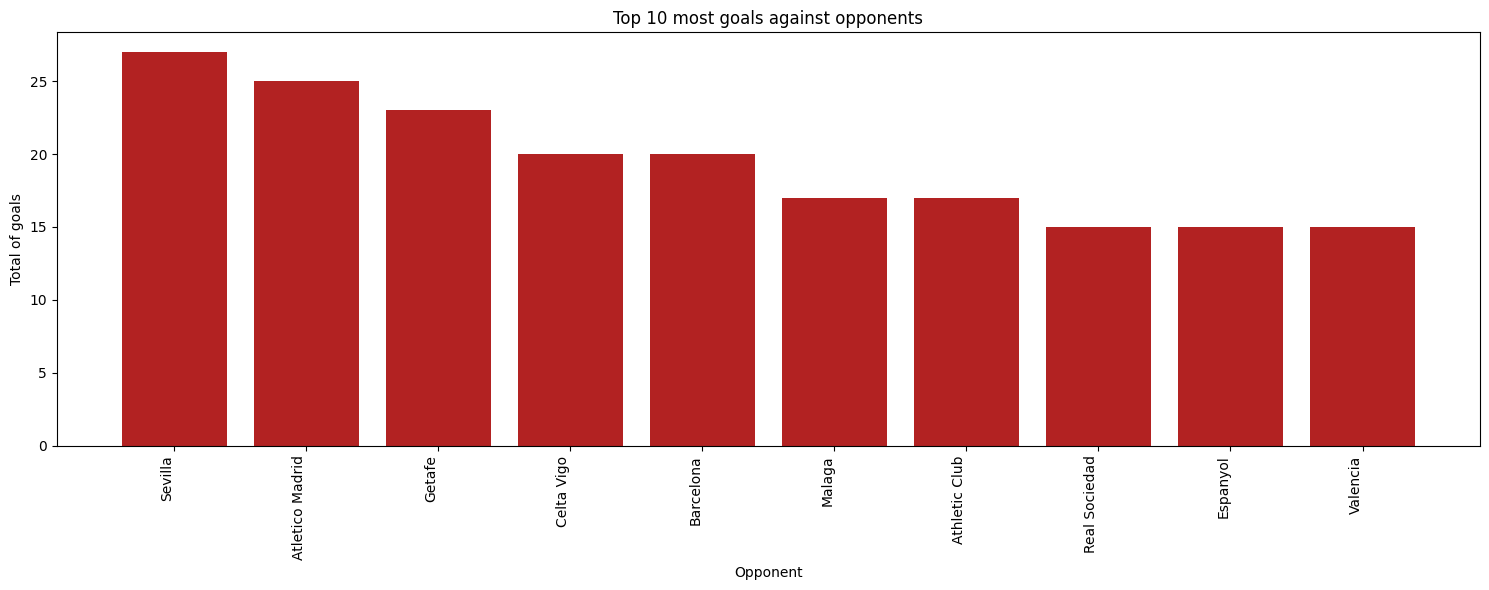

In [14]:
#agrupamos oponentes y goles 
df_oponentes = df.groupby('Opponent')['Goal'].sum().reset_index()

#ordeanamos de manera descendente
df_oponentes = df_oponentes.sort_values(by='Goal', ascending=False)
df_oponentes_top5 = df_oponentes.head(10)
#graficamos con matplotlib
plt.figure(figsize=(15,6))
plt.bar(df_oponentes_top5['Opponent'], df_oponentes_top5['Goal'], color = 'firebrick')

#añadimos etiquetas
plt.xlabel('Opponent')
plt.ylabel('Total of goals')
plt.title('Top 10 most goals against opponents')
#rotamos las etiquetas del eje x para que se lean mejor
plt.xticks(rotation= 90,ha='right')
plt.tight_layout()
plt.show()

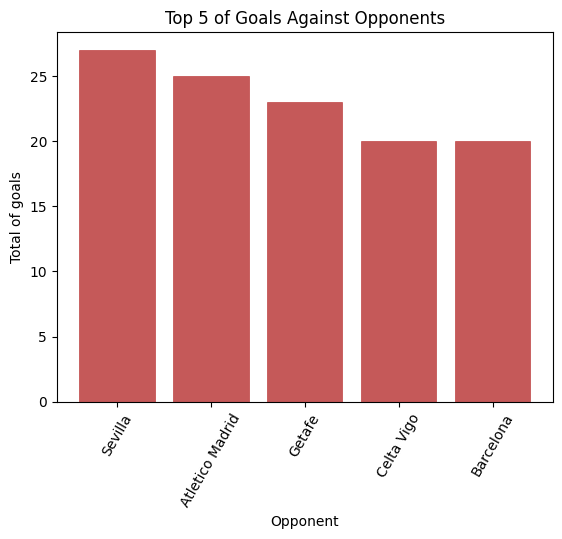

In [15]:
df_oponentes = df.groupby('Opponent')['Goal'].sum().reset_index()
#ordenamos el df por la columna de interes que en este caso es 'Goal'
sort_top = df_oponentes.sort_values(by='Goal', ascending=False)

#seleccionamos los primeros 5 registros
top_5 = sort_top.head(5)

#creamos el gráfico de barras
plt.bar(top_5['Opponent'], top_5['Goal'], color= 'firebrick', edgecolor='firebrick', linewidth=0.5, alpha= 0.75)
#añadimos las etiquetas
plt.xlabel('Opponent')
plt.ylabel('Total of goals')
plt.title('Top 5 of Goals Against Opponents')
#rotamos las etiquetas
plt.xticks(rotation=60)
plt.show()


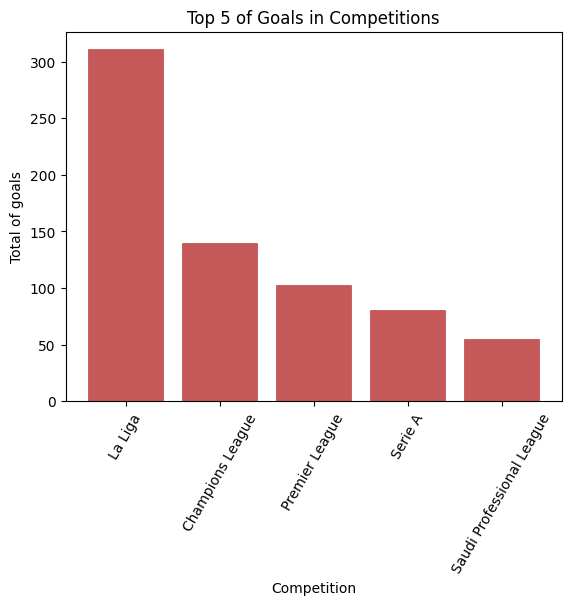

In [16]:
df_oponentes = df.groupby('Competition')['Goal'].sum().reset_index()
#ordenamos el df por la columna de interes que en este caso es 'Goal'
sort_top = df_oponentes.sort_values(by='Goal', ascending=False)

#seleccionamos los primeros 5 registros
top_5 = sort_top.head(5)

#creamos el gráfico de barras
plt.bar(top_5['Competition'], top_5['Goal'], color= 'firebrick', edgecolor='firebrick', linewidth=0.5, alpha= 0.75)
#añadimos las etiquetas
plt.xlabel('Competition')
plt.ylabel('Total of goals')
plt.title('Top 5 of Goals in Competitions')
#rotamos las etiquetas
plt.xticks(rotation=60)
plt.show()


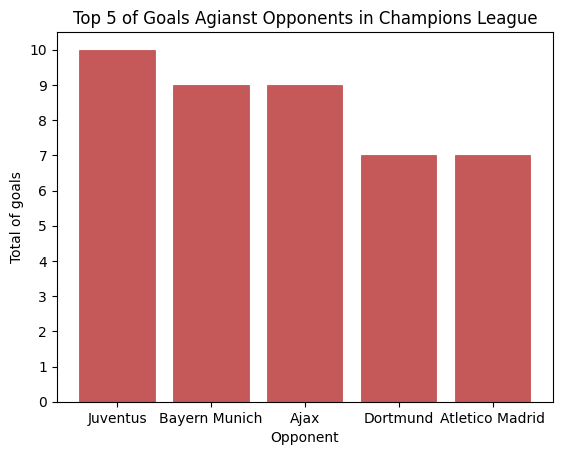

In [17]:
def plot_goals_by_opponent(df_comp, competition = None):
    #filtramos el DF si se proporciona una competicion
    if competition:
        df_comp = df_comp[df_comp['Competition'] == competition]
    
    #filtramos por equipo
    """
    if team:
        df_comp = df_comp[df_comp['Squad'] == team]"""
    
    #agrupamos por oponente y sumamos los goles
    df_op = df_comp.groupby('Opponent')['Goal'].sum().reset_index()

    #ordenamos por la columna de los goles
    sort_top = df_op.sort_values(by='Goal', ascending =False)

    #seleccionamos los primeros 5 registros
    top_5 = sort_top.head(5)

    #creamos el grafico 
    plt.bar(top_5['Opponent'], top_5['Goal'], color= 'firebrick', edgecolor = 'firebrick', linewidth = 0.5, alpha =0.75)

    #añadimos las etiquetas
    plt.xlabel('Opponent')
    plt.ylabel('Total of goals')
    plt.title(f'Top 5 of Goals Agianst Opponents in {competition}')
    #establecemos enteros en el eje de las y
    plt.yticks(range(0, int(sort_top['Goal'].max()) +1, 1))
    #mostramos el gráfico
    plt.show()

plot_goals_by_opponent(df, competition='Champions League')

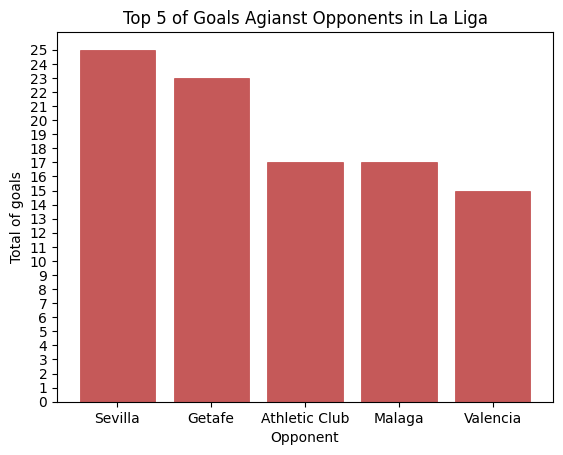

In [18]:
plot_goals_by_opponent(df, competition='La Liga')

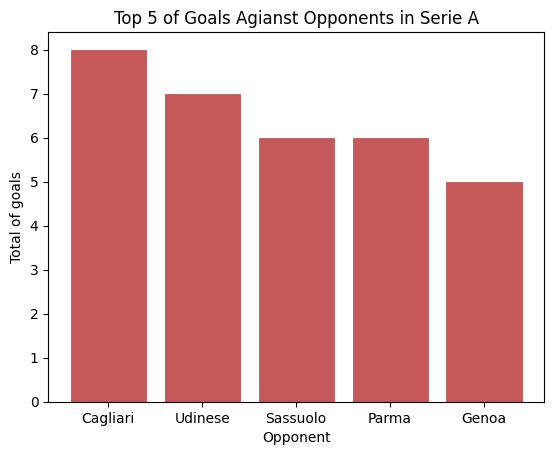

In [19]:
plot_goals_by_opponent(df, competition='Serie A')

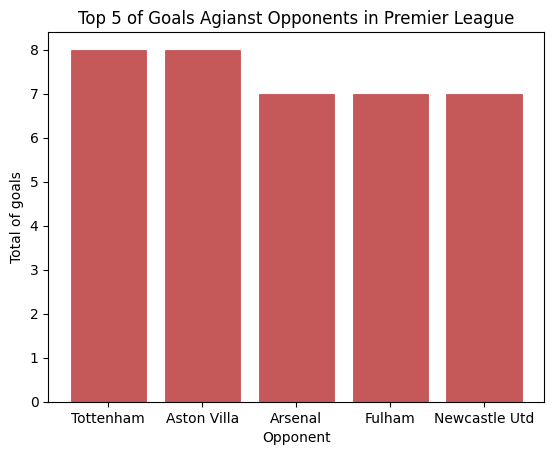

In [20]:
plot_goals_by_opponent(df, competition='Premier League')

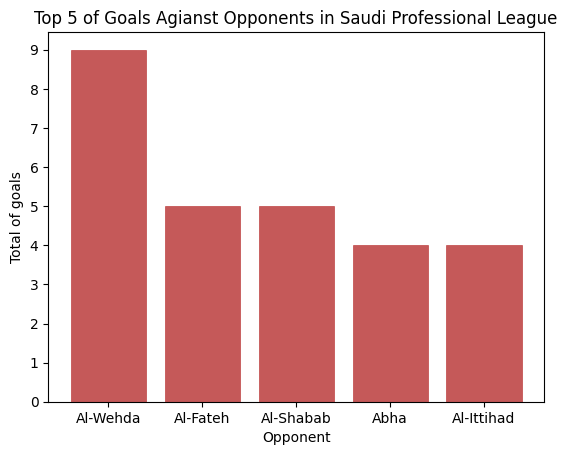

In [21]:
plot_goals_by_opponent(df, competition='Saudi Professional League')

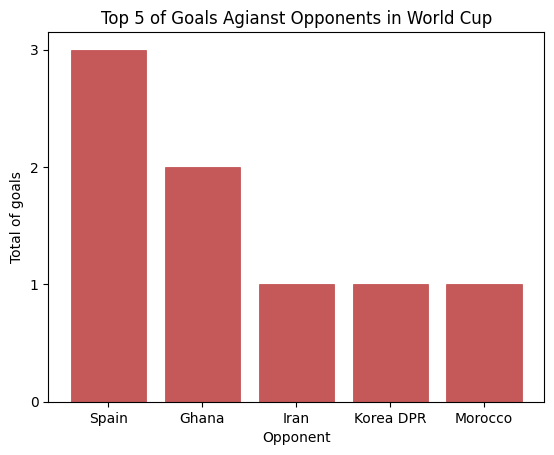

In [22]:
plot_goals_by_opponent(df, competition='World Cup')

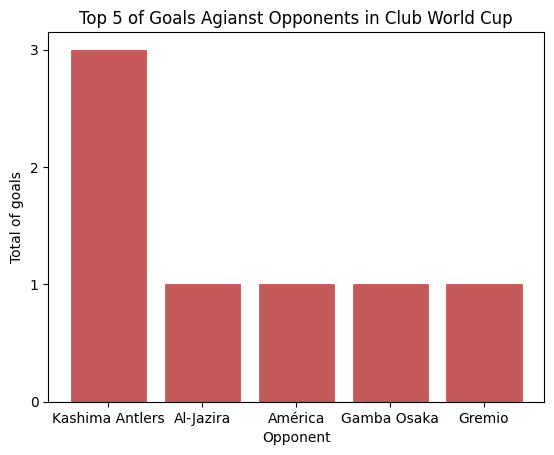

In [23]:
plot_goals_by_opponent(df, competition='Club World Cup')

In [26]:
#agrupamos
start= df.groupby('Start')['Goal'].sum().reset_index()

#Y = yes, N = No, Y* = yes y capitán
#graficamos
fig= px.pie(start, values='Goal',names='Start', title='Starting Percentage in Lineup',
            color=['N','Y','Y*'],
            color_discrete_map= {'N':'#FF5C5C',
                                 'Y': '#30BFDD',
                                 'Y*': '#ACD0F4'},
            hole=0.5)
fig.show()


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly import data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          907 non-null    datetime64[ns]
 1   Competition   907 non-null    object        
 2   Round         907 non-null    object        
 3   Venue         907 non-null    object        
 4   Squad         907 non-null    object        
 5   Opponent      907 non-null    object        
 6   Start         907 non-null    object        
 7   Body Part     907 non-null    object        
 8   Minute        907 non-null    object        
 9   Score         907 non-null    object        
 10  Goalkeeper    907 non-null    object        
 11  Assist        907 non-null    object        
 12  Goal          907 non-null    int64         
 13  Age           907 non-null    int64         
 14  Jersey        907 non-null    int64         
 15  Pos.          907 non-null    object    

In [30]:
#Agrupamos por squad y obtenemos los 5 porteros a los que más goles les ha metido ronaldo
top_5_porteros = df.groupby('Squad').apply(lambda x:x.nlargest(5, 'Goal')).reset_index(drop=True)

#creamos un objeto figura con plotly
fig = go.Figure()

#iteramos sobre cada squad y añadimos una traza de barras para los top 5 porteros a los que más goles a metido por squad

for squad, data, in top_5_porteros.groupby('Squad'):
    fig.add_trace(
        go.Bar(x= data['Goalkeeper'], y=data['Goal'], name=squad)
    )

#prezonalizamos el grafico 
fig.update_layout(
    barmode= 'group',
    xaxis_title = 'Goalkeeper',
    yaxis_title = 'Goal',
    title = 'Top 5 goalkeepers to whom he has scored the most goals'
)

fig.show()
"""
fig = go.Figure(
    data=[
        go.Bar(x=df['Squad'], y=df['Goal'], name=df['Goalkeeper']),
        go.Bar(x=df['Squad'], y=df['Goal'], name=df['Goalkeeper']),
        go.Bar(x=df['Squad'], y=df['Goal'], name=df['Goalkeeper']),
    ],
    layout=dict(
        barcornerradius=15,
    ),
)

fig.show() """

"""
fig = make_subplots(rows=1, cols=5, shared_yaxes=True)

fig.add_trace(
    go.Bar(x=df['Squad'], y=df['Goal'], name= df['Goalkeeper'], marker=dict(cornerradius=30)), 1, 1
)
fig.add_trace(
    go.Bar(x=df['Squad'], y=df['Goal'], name=df['Goalkeeper'], marker=dict(cornerradius="30%")),
    1,
    2,
)

fig.add_trace(
    go.Bar(x=df['Squad'], y=df['Goal'], name=['Goalkeeper']),
    1,
    3,
)

fig.update_layout(bargap=0.2, bargroupgap=0.1)

fig.show()"""

C:\Users\Potato\AppData\Local\Temp\ipykernel_2728\232577569.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



'\nfig = make_subplots(rows=1, cols=5, shared_yaxes=True)\n\nfig.add_trace(\n    go.Bar(x=df[\'Squad\'], y=df[\'Goal\'], name= df[\'Goalkeeper\'], marker=dict(cornerradius=30)), 1, 1\n)\nfig.add_trace(\n    go.Bar(x=df[\'Squad\'], y=df[\'Goal\'], name=df[\'Goalkeeper\'], marker=dict(cornerradius="30%")),\n    1,\n    2,\n)\n\nfig.add_trace(\n    go.Bar(x=df[\'Squad\'], y=df[\'Goal\'], name=[\'Goalkeeper\']),\n    1,\n    3,\n)\n\nfig.update_layout(bargap=0.2, bargroupgap=0.1)\n\nfig.show()'

In [31]:
#agrupamos por columnas los valores que ocuparemos
df_porteros = df.groupby('Goalkeeper')['Goal'].sum().reset_index()
#ordenamos el df por la columna de interes que en este caso es 'Goal'
sort_top_port = df_porteros.sort_values(by='Goal', ascending=False)
#seleccionamos los primeros 5 registros
top_5_port = sort_top_port.head(5)

#agregamos colores
colors = ['#580000', '#7E0F09', '#992219', '#E0291E', '#FF8D79'] 
#graficamos
fig = px.bar(top_5_port, y=top_5_port['Goal'], x=top_5_port['Goalkeeper'], text_auto='.2s',
            title="Top 5 with the most goals against goalkeepers",
            color='Goalkeeper',
            color_discrete_sequence=colors)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(title_x=0.5, title_y=0.9, title_xanchor='center', title_yanchor='top')
fig.show()

c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [32]:
#agrupamos por columnas los valores que ocuparemos
df_sqd = df.groupby('Squad')['Goal'].sum().reset_index()

df_sqd = df_sqd.sort_values(by='Goal', ascending=False)
#agregamos colores
colors = ['#580000', '#7E0F09', '#992219', '#E0291E', '#FF8D79','#FFCCCC'] 
#graficamos
fig = px.bar(df_sqd, y=df_sqd['Goal'], x=df_sqd['Squad'], text_auto='.2s',
            title="Total of Goals by Squad",
            color='Squad',
            color_discrete_sequence=colors)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(title_x=0.5, title_y=0.9, title_xanchor='center', title_yanchor='top')

fig.show()

c:\Users\Potato\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

